In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

M_YIQ = np.array([[0.299, 0.587, 0.114],
                  [0.595716, -0.274453, -0.321263],
                  [0.211456, -0.522591, 0.311135]])

M_RGB = np.array([[1, 0.9563, 0.6210],
                  [1, -0.2721, -0.6474],
                  [1, -1.1070, 1.7046]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, M_YIQ)

def yiq2rgb(img):
    return apply_matrix(img, M_RGB)

def plot_hist(im, bins, ax, cumulative=False):
    counts, borders = np.histogram(im if im.ndim==2 else rgb2yiq(im)[...,0], bins=bins, range=(0,1))
    ax.bar(range(len(counts)), np.cumsum(counts) if cumulative else counts)
    plt.xticks(ax.get_xticks(), labels=np.round(ax.get_xticks()/bins,2))
    plt.grid(alpha=0.3)

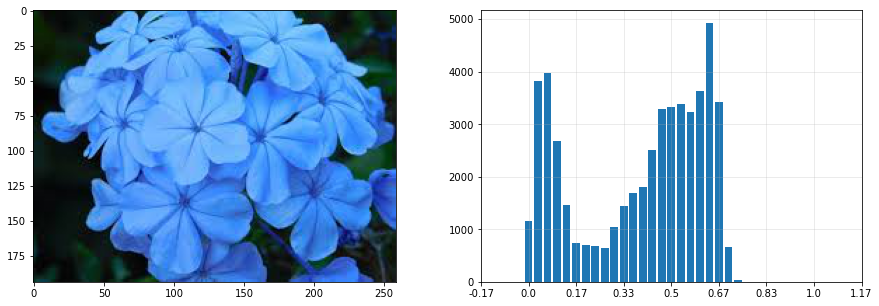

In [2]:
img_rgb = imageio.imread('florazul.jpg')/255

fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(np.clip(img_rgb,0,1))
plot_hist(img_rgb,30, axes[1])

El minimo es 0.0 y el máximo es 0.7846745098039215
El minimo es 0.0 y el máximo es 1.0


Text(0.5, 1.0, 'Histograma Imagen normalizada')

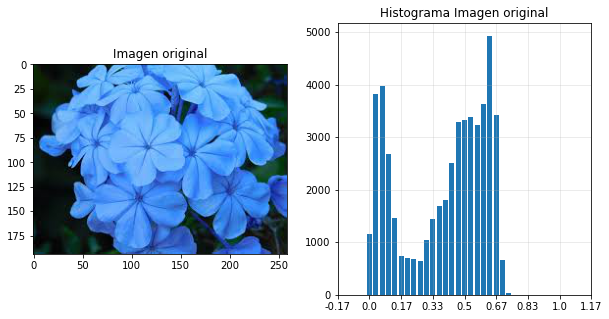

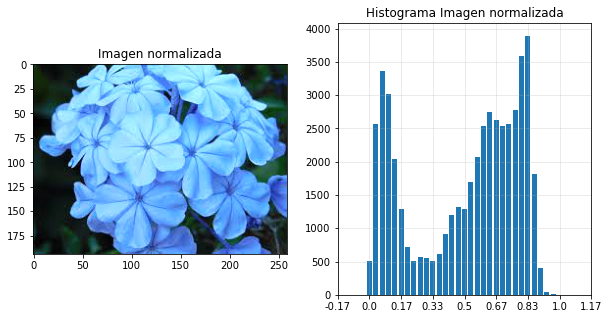

In [3]:
#1) Normalizar el histograma al rango [0, 1]
# Convierto RGB a YIQ
img_gray = rgb2yiq(img_rgb)[:,:,0]
# Chequeo extremos
min1 = img_gray.min()
max1 = img_gray.max()
print("El minimo es "+str(min1)+" y el máximo es "+str(max1))

# Normalización
y_normalizada = np.zeros(img_rgb.shape[0:2])   # Creo matriz llena de ceros
y_normalizada[img_gray>=max1] = 1              # Se setea en 1 donde la luminancia sea mayor  
# y = [{(x-inMin)*(outMax - outMin)} / (inMax - inMin)] + outMin
# outMax=1, outMin=0
y_normalizada[(img_gray>min1) & (img_gray<max1)]=(img_gray[(img_gray>min1) & (img_gray<max1)] - min1)/(max1-min1) #Función para estirar el histograma  
norm_img=rgb2yiq(img_rgb)
norm_img[:,:,0]=y_normalizada #Guardo nuevos valores y convierto a RGB nuevamente
norm_img=yiq2rgb(norm_img) 
# Chequeo extremos
min2= y_normalizada.min()
max2= y_normalizada.max()
print("El minimo es "+str(min2)+" y el máximo es "+str(max2))

# Graficos
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(np.clip(img_rgb,0,1))
axes[0].set_title("Imagen original")
plot_hist(img_rgb,30, axes[1])
axes[1].set_title("Histograma Imagen original")

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(np.clip(norm_img,0,1))
axes[0].set_title("Imagen normalizada")
plot_hist(norm_img,30, axes[1])
axes[1].set_title("Histograma Imagen normalizada")

#Se puede ver que en la imagen original el máximo es 0.74 y luego de la normalización es 1. 
#También se puede apreciar como cambia la luminancia en las hojas de la flor.

el minimo es 0.06677254901960784 y el máx es 0.6614901960784314
el minimo es 0.0 y el máx es 1.0


Text(0.5, 1.0, 'Histograma Imagen normalizada')

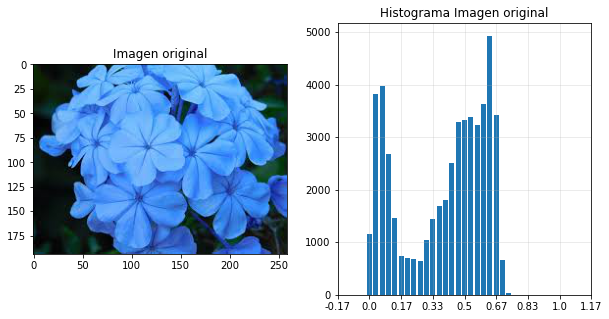

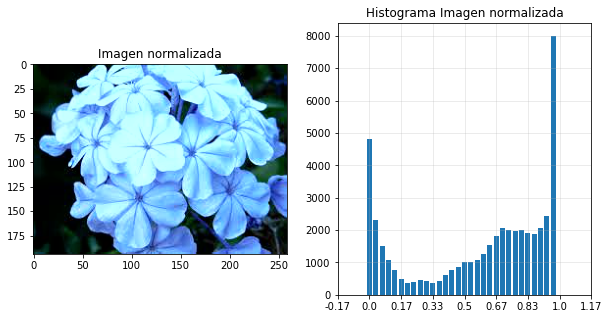

In [4]:
#2) Normalizar el histograma al rango [0, 1] con percentiles.
# Convierto RGB a YIQ
img_gray = rgb2yiq(img_rgb)[:,:,0]

#Minimo y máximo con percentiles
porcentaje=10
minp=np.percentile(img_gray, porcentaje)      
maxp=np.percentile(img_gray, 100-porcentaje)  
print("el minimo es "+str(minp)+" y el máx es "+str(maxp))

# Normalización
y_normalizada = np.zeros(img_rgb.shape[0:2])   # Creo matriz llena de ceros
y_normalizada[img_gray>=maxp] = 1              # Se setea en 1 donde la luminancia sea mayor         
y_normalizada[(img_gray>minp) & (img_gray<maxp)]=(img_gray[(img_gray>minp) & (img_gray<maxp)] - minp)/(maxp-minp) #Función para estirar el histograma  
norm_img=rgb2yiq(img_rgb)
norm_img[:,:,0]=y_normalizada #Guardo nuevos valores y convierto a RGB nuevamente
norm_img=yiq2rgb(norm_img) 

# Chequeo extremos
minp2=np.percentile(y_normalizada, porcentaje)      
maxp2=np.percentile(y_normalizada, 100-porcentaje)  
print("el minimo es "+str(minp2)+" y el máx es "+str(maxp2))

# Graficos
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(np.clip(img_rgb,0,1))
axes[0].set_title("Imagen original")
plot_hist(img_rgb,30, axes[1])
axes[1].set_title("Histograma Imagen original")

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(np.clip(norm_img,0,1))
axes[0].set_title("Imagen normalizada")
plot_hist(norm_img,30, axes[1])
axes[1].set_title("Histograma Imagen normalizada")

#Si usamos percentiles con por ejemplo 10%, voy a normalizar a cero el 10% del minimo, 
#y normalizar a 1 lo que este por arriba de 90% del maximo, quedando un histograma con los extremos 0 y 1 con mayores barras.

Text(0.5, 1.0, 'Histograma Imagen normalizada con gamma (mayor Y)')

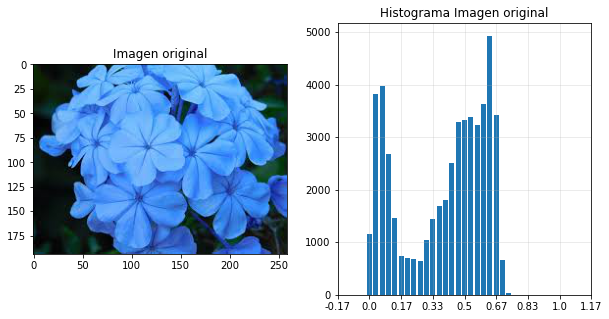

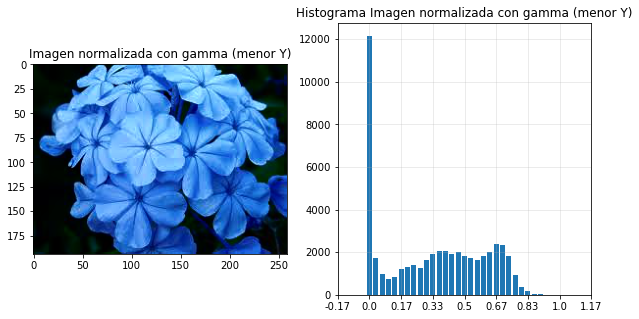

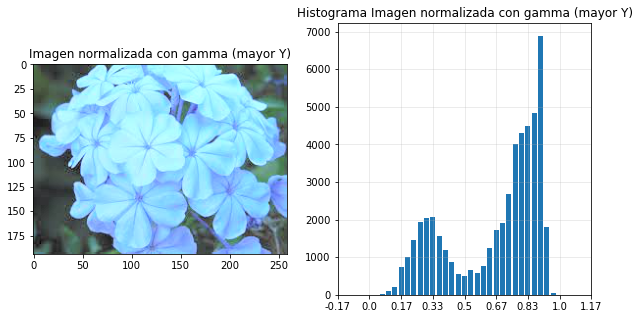

In [5]:
#1) Se normaliza el histograma al rango [0, 1]
# Convierto RGB a YIQ
img_gray = rgb2yiq(img_rgb)[:,:,0]
# Chequeo extremos
min1 = img_gray.min()
max1 = img_gray.max()

# Normalización
y_normalizada = np.zeros(img_rgb.shape[0:2])   # Creo matriz llena de ceros
y_normalizada[img_gray>=max1] = 1              # Se setea en 1 donde la luminancia sea mayor         
y_normalizada[(img_gray>min1) & (img_gray<max1)]=(img_gray[(img_gray>min1) & (img_gray<max1)] - min1)/(max1-min1) #Función para estirar el histograma  
norm_img=rgb2yiq(img_rgb)
norm_img[:,:,0]=y_normalizada #Guardo nuevos valores y convierto a RGB nuevamente
norm_img=yiq2rgb(norm_img) 

#2) Se aplica la corrección gamma a una imagen.
alpha1=1      #Luminocidad disminuye (IMAGEN MÁS OSCURA)
gamma1=2**(alpha1)
y_gamma1=y_normalizada**gamma1 # y_out=y_in^gamma 
norm_img_g1=rgb2yiq(norm_img) #Paso a YIQ
norm_img_g1[:,:,0]=y_gamma1
norm_img_g1=yiq2rgb(norm_img_g1)

alpha2=-1     #Luminocidad aumenta (IMAGEN MÁS CLARA)
gamma2=2**(alpha2)
y_gamma2=y_normalizada**gamma2 # y_out=y_in^gamma 
norm_img_g2=rgb2yiq(norm_img) #Paso a YIQ
norm_img_g2[:,:,0]=y_gamma2
norm_img_g2=yiq2rgb(norm_img_g2)


# Graficos
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(np.clip(img_rgb,0,1))
axes[0].set_title("Imagen original")
plot_hist(img_rgb,30, axes[1])
axes[1].set_title("Histograma Imagen original")

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(np.clip(norm_img_g1,0,1))
axes[0].set_title("Imagen normalizada con gamma (menor Y)")
plot_hist(norm_img_g1,30, axes[1])
axes[1].set_title("Histograma Imagen normalizada con gamma (menor Y)")

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(np.clip(norm_img_g2,0,1))
axes[0].set_title("Imagen normalizada con gamma (mayor Y)")
plot_hist(norm_img_g2,30, axes[1])
axes[1].set_title("Histograma Imagen normalizada con gamma (mayor Y)")



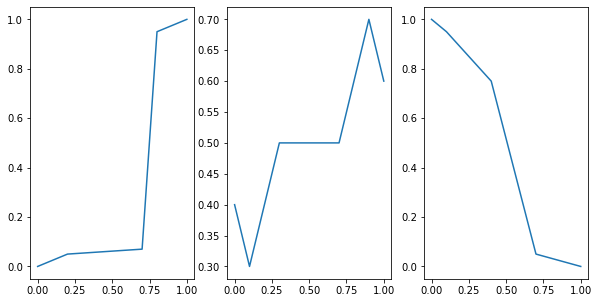

In [21]:
#Funciones
img_yiq = rgb2yiq(img_rgb)
img_yiq_y = img_yiq[:,:,0]
img_yiq_i = img_yiq[:,:,1]
img_yiq_q = img_yiq[:,:,2]

#Raiz Cuadrada
img_yiq_y_mod_R = np.sqrt(img_yiq_y)
img_yiq_mod_R = np.zeros(img_rgb.shape)
img_yiq_mod_R[:,:,0] = img_yiq_y_mod_R
img_yiq_mod_R[:,:,1] = img_yiq_i
img_yiq_mod_R[:,:,2] = img_yiq_q
img_rgb_mod_R = yiq2rgb(img_yiq_mod_R)

#Función cuadrática
img_yiq_y_mod_C = np.square(img_yiq_y)
img_yiq_mod_C= np.zeros(img_rgb.shape)
img_yiq_mod_C[:,:,0] = img_yiq_y_mod_C
img_yiq_mod_C[:,:,1] = img_yiq_i
img_yiq_mod_C[:,:,2] = img_yiq_q
img_rgb_mod_C = yiq2rgb(img_yiq_mod_C)

#Lineal a trozos
x = np.array([0, 0.2, 0.7, 0.8,  1]) #[0 ... 1]
y = np.array([0, 0.05, 0.07, 0.95, 1]) #[0 ... 1]
img_yiq_y_mod_L = np.interp(img_yiq_y, x, y)

img_yiq_mod_L = np.zeros(img_rgb.shape)
img_yiq_mod_L[:,:,0] = img_yiq_y_mod_L
img_yiq_mod_L[:,:,1] = img_yiq_i
img_yiq_mod_L[:,:,2] = img_yiq_q
img_rgb_mod_L = yiq2rgb(img_yiq_mod_L)

#Lineal a trozos otro ejemplo
x2 = np.array([0, 0.1, 0.3, 0.7, 0.9, 1]) #[0 ... 1]
y2 = np.array([0.4, 0.3, 0.5, 0.5, 0.7,0.6]) #[0 ... 1]
img_yiq_y_mod_L2 = np.interp(img_yiq_y, x2, y2)

img_yiq_mod_L2 = np.zeros(img_rgb.shape)
img_yiq_mod_L2[:,:,0] = img_yiq_y_mod_L2
img_yiq_mod_L2[:,:,1] = img_yiq_i
img_yiq_mod_L2[:,:,2] = img_yiq_q
img_rgb_mod_L2 = yiq2rgb(img_yiq_mod_L2)

#Lineal a trozos otro ejemplo
x3 = np.array([0, 0.1, 0.4, 0.7,  1]) #[0 ... 1]
y3 = np.array([1, 0.95, 0.75, 0.05, 0]) #[0 ... 1]
img_yiq_y_mod_L3 = np.interp(img_yiq_y, x3, y3)

img_yiq_mod_L3 = np.zeros(img_rgb.shape)
img_yiq_mod_L3[:,:,0] = img_yiq_y_mod_L3
img_yiq_mod_L3[:,:,1] = img_yiq_i
img_yiq_mod_L3[:,:,2] = img_yiq_q
img_rgb_mod_L3 = yiq2rgb(img_yiq_mod_L3)

plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.plot(x,y)
plt.subplot(132)
plt.plot(x2, y2)
plt.subplot(133)
plt.plot(x3,y3)

Text(0.5, 1.0, 'Histograma Imagen función Lineal a trozos')

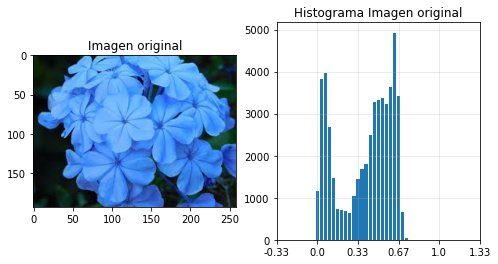

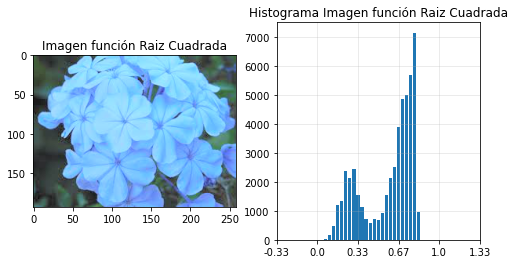

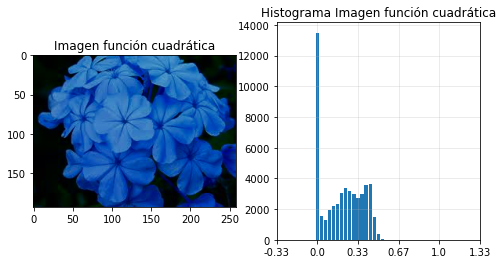

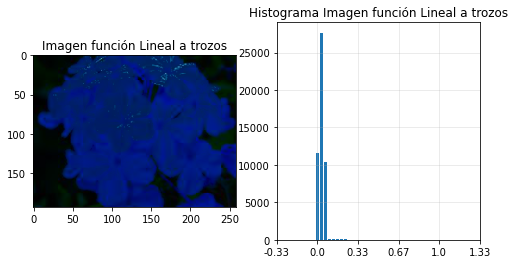

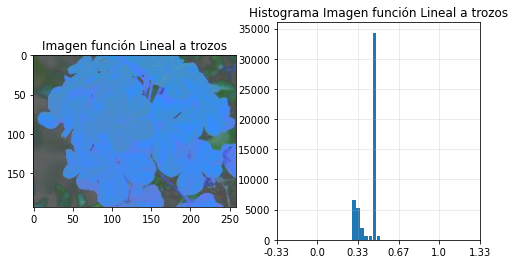

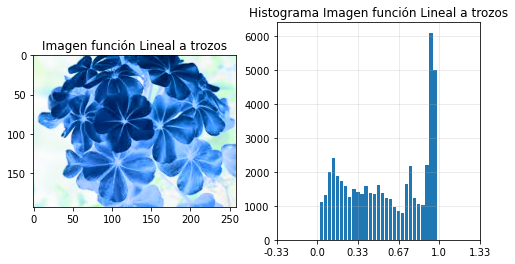

In [24]:
#Graficos
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].imshow(np.clip(img_rgb,0,1))
axes[0].set_title("Imagen original")
plot_hist(img_rgb, 30, axes[1])
axes[1].set_title("Histograma Imagen original")

fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].imshow(np.clip(img_rgb_mod_R,0,1))
axes[0].set_title("Imagen función Raiz Cuadrada")
plot_hist(img_rgb_mod_R, 30, axes[1])
axes[1].set_title("Histograma Imagen función Raiz Cuadrada")
#Por como es la función raiz cuadrada obtendre una imagen más luminosa, clarita, porque valores de entrada
#bajos ya pasan a ser valores de salida muy altos, y valores altos no se veeran muy influenciados

fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].imshow(np.clip(img_rgb_mod_C,0,1))
axes[0].set_title("Imagen función cuadrática")
plot_hist(img_rgb_mod_C, 30, axes[1])
axes[1].set_title("Histograma Imagen función cuadrática")
#Por como es la función cuadratica obtendre lo contrario a la raiz, será una imagen más oscura 
#porque aparece el efecto no lineal en los primeros valores de entrada

#Luego con las funciones lineales a trozos me voy de un extremo al otro en cuanto a la luminancia de la imagen
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].imshow(np.clip(img_rgb_mod_L,0,1))
axes[0].set_title("Imagen función Lineal a trozos")
plot_hist(img_rgb_mod_L, 30, axes[1])
axes[1].set_title("Histograma Imagen función Lineal a trozos")

fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].imshow(np.clip(img_rgb_mod_L2,0,1))
axes[0].set_title("Imagen función Lineal a trozos")
plot_hist(img_rgb_mod_L2, 30, axes[1])
axes[1].set_title("Histograma Imagen función Lineal a trozos")

fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].imshow(np.clip(img_rgb_mod_L3,0,1))
axes[0].set_title("Imagen función Lineal a trozos")
plot_hist(img_rgb_mod_L3, 30, axes[1])
axes[1].set_title("Histograma Imagen función Lineal a trozos")